In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from skimage import io, transform
from sklearn import preprocessing
import numpy as np
import joblib
import cv2

ModuleNotFoundError: No module named 'skimage'

In [2]:
path = r"dataset"
model_folder = "model"
categories = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
categories


['Arjuna', 'Chinar', 'Gauva', 'Jatropha']

In [3]:
X_file = os.path.join(model_folder, "X.txt.npy")
Y_file = os.path.join(model_folder, "Y.txt.npy")
if os.path.exists(X_file) and os.path.exists(Y_file):
    X = np.load(X_file)
    Y = np.load(Y_file)
    print("X and Y arrays loaded successfully.")
else:
    X = [] # input array
    Y = [] # output array
    for root, dirs, directory in os.walk(path):
        for j in range(len(directory)):
            name = os.path.basename(root)
            print(f'Loading category: {dirs}')
            print(name+" "+root+"/"+directory[j])
            if 'Thumbs.db' not in directory[j]:
                img_array = cv2.imread(root+"/"+directory[j])
                img_resized = resize(img_array, (64, 64, 3))
                # Append the input image array to X
                X.append(img_resized.flatten())
                # Append the index of the category in categories list to Y
                Y.append(categories.index(name))
    X = np.array(X)
    Y = np.array(Y)
    np.save(X_file, X)
    np.ave(Y_file, Y)

X and Y arrays loaded successfully.


In [4]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.35,random_state=44)

In [5]:
labels=categories

In [6]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [7]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# ETC Classifier

Extra Trees Classifier Accuracy    : 92.21311475409836
Extra Trees Classifier Precision   : 91.91599421805962
Extra Trees Classifier Recall      : 88.30696123799572
Extra Trees Classifier FSCORE      : 89.33575034774097

 Extra Trees Classifier classification report
               precision    recall  f1-score   support

      Arjuna       0.99      0.92      0.95        83
      Chinar       0.66      0.96      0.78        24
       Gauva       0.98      0.97      0.97        88
    Jatropha       0.91      0.84      0.87        49

    accuracy                           0.92       244
   macro avg       0.88      0.92      0.89       244
weighted avg       0.94      0.92      0.93       244



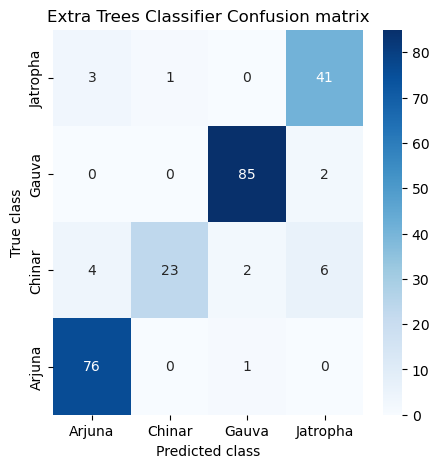

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
Model_file = os.path.join(model_folder, "ETC_Model.pkl")
if os.path.exists(Model_file):
    # Load the model from the pkl file
    etc_classifier = joblib.load(Model_file)
    predict = etc_classifier.predict(x_test)
    calculateMetrics("Extra Trees Classifier", predict, y_test)
else:
    etc_classifier = ExtraTreesClassifier()
    etc_classifier.fit(x_train, y_train)
    # Save the model weights to a pkl file
    joblib.dump(etc_classifier, Model_file)  
    predict = etc_classifier.predict(x_test)
    print("ETC trained and model weights saved.")
    calculateMetrics("Extra Trees Classifier", predict, y_test)
    

XGBoost Classifier Accuracy    : 88.9344262295082
XGBoost Classifier Precision   : 88.48459999534742
XGBoost Classifier Recall      : 83.03154699706424
XGBoost Classifier FSCORE      : 84.52321684569691

 XGBoost Classifier classification report
               precision    recall  f1-score   support

      Arjuna       0.97      0.84      0.90        89
      Chinar       0.51      0.86      0.64        21
       Gauva       0.99      0.93      0.96        92
    Jatropha       0.84      0.90      0.87        42

    accuracy                           0.89       244
   macro avg       0.83      0.88      0.85       244
weighted avg       0.92      0.89      0.90       244



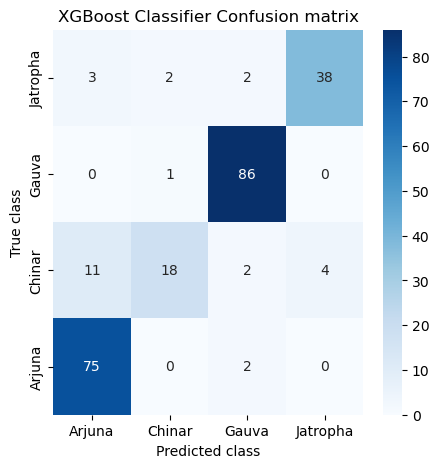

In [9]:
from xgboost import XGBClassifier

Model_file = os.path.join(model_folder, "XGB_Model.pkl")
if os.path.exists(Model_file):
    # Load the model from the pkl file
    xgb_classifier = joblib.load(Model_file)
    predict = xgb_classifier.predict(x_test)
    calculateMetrics("XGBoost Classifier", predict, y_test)
else:
    xgb_classifier = XGBClassifier()
    xgb_classifier.fit(x_train, y_train)
    # Save the model weights to a pkl file
    joblib.dump(xgb_classifier, Model_file)
    predict = xgb_classifier.predict(x_test)
    print("XGB trained and model weights saved.")
    calculateMetrics("XGBoost Classifier", predict, y_test)

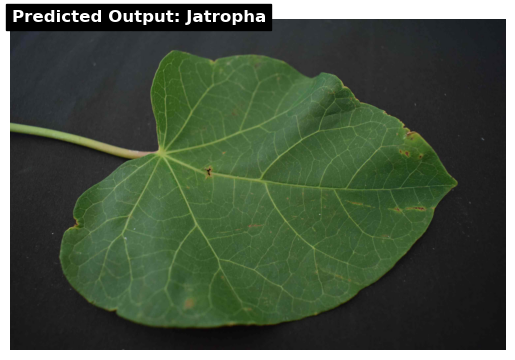

In [10]:
path=r"C:\Users\DELL\OneDrive\Documents\Plant species\dataset\Jatropha\0018_0012.jpg"
img=imread(path)
img_resize=resize(img,(64,64,3))
img_preprocessed=[img_resize.flatten()]
output_number=etc_classifier.predict(img_preprocessed)[0]
output_name=categories[output_number]

plt.imshow(img)
plt.text(10, 10, f'Predicted Output: {output_name}', color='white', fontsize=12, weight='bold', backgroundcolor='black')
plt.axis('off')
plt.show()